# 🌐 API Testing Notebook

This notebook shows how to interact with the Mushroom AI API.

**Prerequisites:**
- Model must be trained (run `02_model_training.ipynb` or `scripts/train_model.py`)
- API server must be running (`python api/main.py`)

In [1]:
import requests
import json
import pandas as pd

# API base URL
BASE_URL = "http://localhost:8000"

print("✅ Libraries imported")
print(f"API URL: {BASE_URL}")

✅ Libraries imported
API URL: http://localhost:8000


## 1. Health Check

In [2]:
# Check if API is running
response = requests.get(f"{BASE_URL}/health")

if response.status_code == 200:
    print("✅ API is running!")
    print(json.dumps(response.json(), indent=2))
else:
    print(f"❌ API error: {response.status_code}")
    print("Make sure to start the API with: python api/main.py")

✅ API is running!
{
  "status": "healthy",
  "version": "2.0.0",
  "model_loaded": true
}


## 2. Example Mushroom Data

In [12]:
# Example 1: Potentially poisonous mushroom
poisonous_mushroom = {
    "cap_diameter": 15.0,
    "cap_shape": "convex",
    "cap_surface": "smooth",
    "cap_color": "red",
    "does_bruise_or_bleed": "no",
    "gill_attachment": "free",
    "gill_spacing": "close",
    "gill_color": "white",
    "stem_height": 16.0,
    "stem_width": 18.0,
    "stem_root": "bulbous",
    "stem_surface": "smooth",
    "stem_color": "white",
    "veil_type": "partial",
    "veil_color": "white",
    "has_ring": "ring",
    "ring_type": "pendant",
    "spore_print_color": "white",
    "habitat": "woods",
    "season": "autumn"
}

# Example 2: Potentially edible mushroom
edible_mushroom = {
    "cap_diameter": 8.0,
    "cap_shape": "flat",
    "cap_surface": "smooth",
    "cap_color": "white",
    "does_bruise_or_bleed": "bruises",
    "gill_attachment": "free",
    "gill_spacing": "close",
    "gill_color": "brown",
    "stem_height": 7.0,
    "stem_width": 12.0,
    "stem_root": "equal",
    "stem_surface": "smooth",
    "stem_color": "white",
    "veil_type": "partial",
    "veil_color": "white",
    "has_ring": "ring",
    "ring_type": "pendant",
    "spore_print_color": "brown",
    "habitat": "meadows",
    "season": "summer"
}

print("✅ Example mushroom data created")

✅ Example mushroom data created


## 3. Complete Prediction

In [13]:
# Test complete prediction
response = requests.post(
    f"{BASE_URL}/api/v1/predict/complete",
    json=poisonous_mushroom
)

if response.status_code == 200:
    result = response.json()
    print("\n" + "="*80)
    print(" COMPLETE PREDICTION RESULT")
    print("="*80)
    print(json.dumps(result, indent=2))
else:
    print(f"❌ Error: {response.status_code}")
    print(response.text)


 COMPLETE PREDICTION RESULT
{
  "species": {
    "name": "Fly Agaric",
    "confidence": 0.8440161645412445
  },
  "family": {
    "name": "Amanita Family",
    "confidence": 0.8018153563141822
  },
  "edibility": {
    "class_name": "Poisonous",
    "confidence": 0.8271358412504196,
    "warning": "\u26a0\ufe0f POISONOUS - Fly Agaric can cause serious illness"
  },
  "habitat": {
    "primary": "d",
    "confidence": 0.7174137398600579,
    "also_found_in": []
  },
  "season": {
    "primary": "a",
    "confidence": 0.6752129316329957,
    "also_found_in": []
  },
  "risk_assessment": {
    "level": "DANGER",
    "message": "POISONOUS - Fly Agaric can cause serious illness. DO NOT consume.",
    "lookalikes": [
      {
        "name": "Caesar's Mushroom",
        "edible": true,
        "warning": "Caesar's Mushroom has yellow gills while Fly Agaric has white gills. Be absolutely certain."
      }
    ]
  },
  "metadata": {
    "timestamp": "2025-12-16T19:28:13.816073Z",
    "model_v

## 4. Species-Only Prediction

In [14]:
# Test species-only prediction (faster)
response = requests.post(
    f"{BASE_URL}/api/v1/predict/species",
    json=edible_mushroom
)

if response.status_code == 200:
    result = response.json()
    print("\n🍄 Species Prediction:")
    print(json.dumps(result, indent=2))
else:
    print(f"❌ Error: {response.status_code}")


🍄 Species Prediction:
{
  "species": "Poison Pie",
  "confidence": 0.7859745025634766,
  "processing_time_ms": 25.0
}


## 5. Safety Check

In [15]:
# Test safety check (edibility + warnings)
response = requests.post(
    f"{BASE_URL}/api/v1/predict/safety",
    json=poisonous_mushroom
)

if response.status_code == 200:
    result = response.json()
    print("\n⚠️ Safety Check Result:")
    print(json.dumps(result, indent=2))
else:
    print(f"❌ Error: {response.status_code}")


⚠️ Safety Check Result:
{
  "species": "Fly Agaric",
  "edibility": "Poisonous",
  "confidence": 0.8440161645412445,
  "risk_level": "DANGER",
  "warning": "POISONOUS - Fly Agaric can cause serious illness. DO NOT consume.",
  "lookalikes": [
    {
      "name": "Caesar's Mushroom",
      "edible": true,
      "warning": "Caesar's Mushroom has yellow gills while Fly Agaric has white gills. Be absolutely certain."
    }
  ]
}


## 6. Foraging Information

In [16]:
# Test foraging info (habitat + season + edibility)
response = requests.post(
    f"{BASE_URL}/api/v1/predict/foraging",
    json=edible_mushroom
)

if response.status_code == 200:
    result = response.json()
    print("\n🌲 Foraging Information:")
    print(json.dumps(result, indent=2))
else:
    print(f"❌ Error: {response.status_code}")


🌲 Foraging Information:
{
  "species": "Poison Pie",
  "edibility": "Poisonous",
  "habitat": "d",
  "season": "a",
  "confidence": 0.7859745025634766,
  "foraging_tip": "Look for Poison Pie in d during a."
}


## 7. Batch Testing

In [17]:
# Test multiple mushrooms
test_mushrooms = [poisonous_mushroom, edible_mushroom]
results = []

for idx, mushroom in enumerate(test_mushrooms):
    response = requests.post(
        f"{BASE_URL}/api/v1/predict/complete",
        json=mushroom
    )
    
    if response.status_code == 200:
        result = response.json()
        results.append({
            'mushroom': idx + 1,
            'species': result['species']['name'],
            'edibility': result['edibility']['class_name'],
            'confidence': result['edibility']['confidence'],
            'risk_level': result['risk_assessment']['level']
        })

# Display results as DataFrame
df_results = pd.DataFrame(results)
print("\n📊 Batch Prediction Results:")
print(df_results)


📊 Batch Prediction Results:
   mushroom     species  edibility  confidence risk_level
0         1  Fly Agaric  Poisonous    0.827136     DANGER
1         2  Poison Pie  Poisonous    0.770255     DANGER


## 8. Error Handling Test

In [18]:
# Test with invalid data
invalid_data = {
    "cap_diameter": -5.0,  # Invalid: negative value
    "cap_shape": "invalid_shape",  # Invalid: not in enum
    # Missing required fields
}

response = requests.post(
    f"{BASE_URL}/api/v1/predict/complete",
    json=invalid_data
)

print("\n⚠️ Testing error handling with invalid data:")
print(f"Status Code: {response.status_code}")
print("Response:")
print(json.dumps(response.json(), indent=2))
print("\n✅ API correctly validates and rejects invalid input!")


⚠️ Testing error handling with invalid data:
Status Code: 422
Response:
{
  "detail": [
    {
      "type": "greater_than",
      "loc": [
        "body",
        "cap_diameter"
      ],
      "msg": "Input should be greater than 0",
      "input": -5.0,
      "ctx": {
        "gt": 0.0
      }
    },
    {
      "type": "enum",
      "loc": [
        "body",
        "cap_shape"
      ],
      "msg": "Input should be 'bell', 'conical', 'convex', 'flat', 'sunken', 'spherical' or 'others'",
      "input": "invalid_shape",
      "ctx": {
        "expected": "'bell', 'conical', 'convex', 'flat', 'sunken', 'spherical' or 'others'"
      }
    },
    {
      "type": "missing",
      "loc": [
        "body",
        "cap_surface"
      ],
      "msg": "Field required",
      "input": {
        "cap_diameter": -5.0,
        "cap_shape": "invalid_shape"
      }
    },
    {
      "type": "missing",
      "loc": [
        "body",
        "cap_color"
      ],
      "msg": "Field required",
     

## 9. Performance Testing


⏱️  Testing API performance (10 requests)...

Average response time: 2095.56 ms
Min: 2080.46 ms
Max: 2113.45 ms


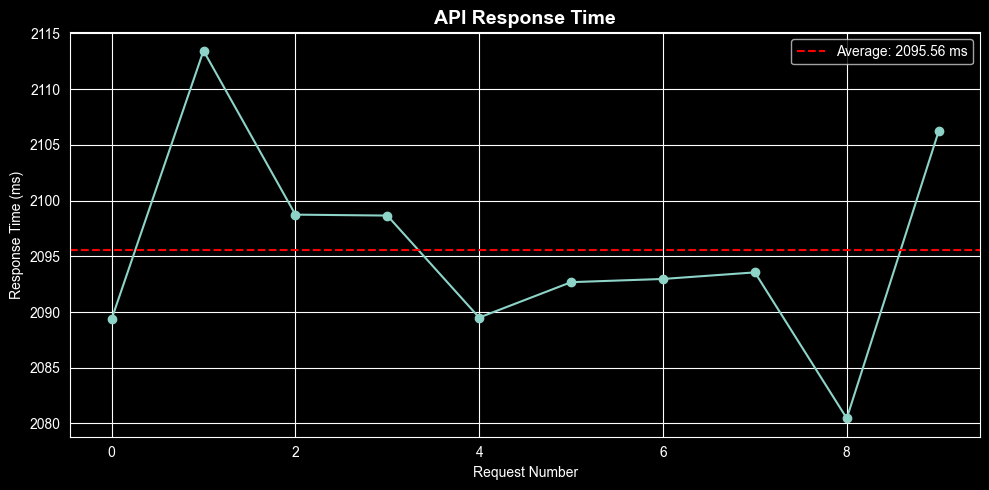

In [19]:
import time

# Measure API response time
n_requests = 10
times = []

print(f"\n⏱️  Testing API performance ({n_requests} requests)...")

for i in range(n_requests):
    start = time.time()
    response = requests.post(
        f"{BASE_URL}/api/v1/predict/complete",
        json=edible_mushroom
    )
    elapsed = (time.time() - start) * 1000  # Convert to ms
    times.append(elapsed)

print(f"\nAverage response time: {sum(times)/len(times):.2f} ms")
print(f"Min: {min(times):.2f} ms")
print(f"Max: {max(times):.2f} ms")

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(times, marker='o')
plt.axhline(sum(times)/len(times), color='r', linestyle='--', label=f'Average: {sum(times)/len(times):.2f} ms')
plt.title('API Response Time', fontsize=14, fontweight='bold')
plt.xlabel('Request Number')
plt.ylabel('Response Time (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated:
- ✅ Health check
- ✅ Complete prediction endpoint
- ✅ Species-only prediction
- ✅ Safety check
- ✅ Foraging information
- ✅ Batch testing
- ✅ Error handling
- ✅ Performance measurement
